In [42]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

%matplotlib inline

In [2]:
eq1 = np.array([
    [0,0,-52], # x to the power of 1
    [4,4,-19] # x to the power of 0
])

eq2 = np.array([
    [0, 0, 169], # x to the power of 2
    [0, 0, -111], # x to the power of 1
    [3, -10, 0] # x to the power of 0
])

sys_eq = [
    eq1,
    eq2
]

In [3]:
def evaluate_polynomial_2d(poly2d, point):
    
    """ poly - polynomial with 2 variables, will be represented by a two dimensional coefficient matrix.
        row index is the order of x, column index is the order of y.
        For example: 
            [
                [0,0,-52], # x to the power of 1
                [4,4,-19] # x to the power of 0
            ]
        point - a tuple (x,y). For example: (-0.01, -0.01)
    """
    x, y = point
    poly2d = np.array(poly2d)
    m, n = poly2d.shape
    _sum = 0
    
    for i in range(m):
        x_order = m-(i+1)
        for j in range(n):
            y_order = n-(j+1)
            coef = poly2d[i][j]
            _sum += coef*(x**x_order)*(y**y_order)
    
    return _sum
            

In [4]:
def evaluate_partial_derivatives(poly2d, point):
    
    """
    """
    x, y = point
    x1 = x - 0.0001
    y1 = y - 0.0001
    
    # polynomial value at x,y
    pxy = evaluate_polynomial_2d(poly2d, point)
    # polynomial value at x1,y
    px1y = evaluate_polynomial_2d(poly2d, (x1,y))
    # polynomial value at x,y1
    pxy1 = evaluate_polynomial_2d(poly2d, (x,y1))
    
    # partial derivative by x, while y remains is constant
    x_derivative = (pxy - px1y)/(x - x1)
    # partial derivative by y, while x remains is constant
    y_derivative = (pxy - pxy1)/(y - y1)
    
    return x_derivative, y_derivative

In [5]:
def newton_raphson_2d(equations, point, epsilon, i=1):
    
    """
    """
    eq_value_at_point = []
    
    # evaluate system of eqations at point
    for eq in equations:
        # evaluate every eqation (polynomial) at point and append result to eq_value_at_point
        eq_value = evaluate_polynomial_2d(eq, point)
        eq_value_at_point.append(eq_value)
    
    # if evalutation is close enough to zero (less than epsilon) return point
    if all([np.abs(val) <= epsilon for val in eq_value_at_point]):
        print(f"number of iterations: {i}")
        return point
    # else use newton formula to calucalte next point
    else:
        eq_derivative_at_point = []
        # evaluate partial derivaites of every eqation
        for eq in equations:
            eq_derivaitves = evaluate_partial_derivatives(eq, point)
            eq_derivative_at_point.append(eq_derivaitves)
        
        f, g = eq_value_at_point
        fx, fy = eq_derivative_at_point[0]
        gx, gy = eq_derivative_at_point[1]
        
        denominator = (fx*gy - gx*fy)
        
        if denominator != 0:
            x,y = point
            x_new = x - (f*gy - g*fy)/denominator
            y_new = y - (g*fx - f*gx)/denominator
            # call newton_raphson_2d again with new point
            return newton_raphson_2d(equations, (x_new, y_new), epsilon, i=i+1)
        else:
            print(f"number of iterations: {i}")
            return point

In [88]:
starting_point = (-0.01, -0.01)
newton_raphson_2d(sys_eq, starting_point, epsilon=10**-4)

number of iterations: 6


(-0.06761077960195135, 1.5300393753147177)

# Plot

In [7]:
x = np.linspace(-10, 10, 1000)
y = np.linspace(-5, 5, 1000)

X, Y = np.meshgrid(x, y)

def f(x, y):
    return np.sin(4*y)*np.cos(0.5*x)

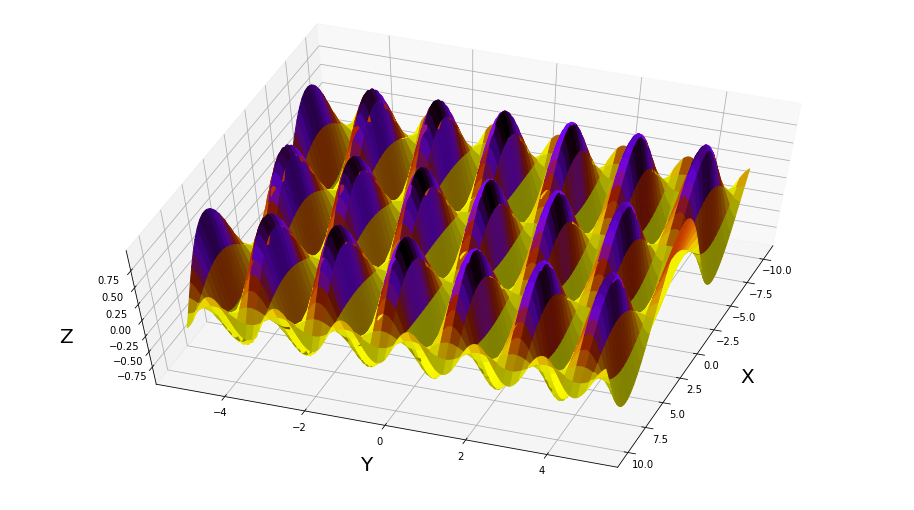

In [82]:
Z = f(X,Y)

fig = plt.figure(figsize=(16,9))
ax = plt.axes(projection="3d")

ax.plot_surface(X,Y,Z, facecolors=plt.cm.gnuplot_r(Z))
ax.view_init(elev=60,azim=20)
fsize = 20
ax.set_xlabel("X", fontsize=fsize)
ax.set_ylabel("Y", fontsize=fsize)
ax.set_zlabel("Z", fontsize=fsize)
ax.xaxis.labelpad = fsize
ax.yaxis.labelpad = fsize
ax.zaxis.labelpad = fsize
plt.savefig("fig3.png", bbox_inches="tight")
plt.show()